In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path ke file dataset di Google Drive
labeled_dataset_path = '/content/drive/My Drive/BDC_SatriaData_2024/dataset/dataset_penyisihan_bdc_2024.xlsx'
unlabeled_dataset_path = '/content/drive/My Drive/BDC_SatriaData_2024/dataset/dataset_unlabeled_penyisihan_bdc_2024.xlsx'

labeled_df = pd.read_excel(labeled_dataset_path)
unlabeled_df = pd.read_excel(unlabeled_dataset_path)

print(f"Length Labeled Dataset: {len(labeled_df)}")
print(f"Length Unlabeled Dataset: {len(unlabeled_df)}")

Length Labeled Dataset: 5000
Length Unlabeled Dataset: 1000


## Pra-pemrosesan Data

In [ ]:
# Module to fix bad unicode string
!pip install ftfy
import ftfy

In [ ]:
# Fixing bad unicode string
labeled_df['clean_text'] = labeled_df['text'].apply(ftfy.fix_text)
unlabeled_df['clean_text'] = unlabeled_df['Text'].apply(ftfy.fix_text)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
# Contoh fungsi pembersihan teks
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Hilangkan URL
    text = re.sub(r'@[^ ]+', '', text)  # Hilangkan mention
    text = re.sub(r'#[^ ]+', '', text)  # Hilangkan hashtag
    text = re.sub(r'\[RE [\w\W]+\]', '', text)  # Reply specifier
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Hilangkan karakter khusus
    text = text.lower()  # Ubah ke huruf kecil
    return text

In [ ]:
# Terapkan fungsi pada kolom teks
labeled_df['clean_text'] = labeled_df['clean_text'].apply(clean_text)
unlabeled_df['clean_text'] = unlabeled_df['clean_text'].apply(clean_text)

## Tokenisasi dan Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')

# Gunakan stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Fungsi tokenisasi dan stopword removal
def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

labeled_df['processed_text'] = labeled_df['clean_text'].apply(preprocess_text)
unlabeled_df['processed_text'] = unlabeled_df['clean_text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(labeled_df['text'][5])
print(labeled_df['clean_text'][5])
print(labeled_df['processed_text'][5])

RT Duh jangan sampai Pak lurah denger nih ÃƒÂ°Ã‚Å¸Ã‚Â¤Ã‚Â­ Di Acara Hajatan Rakyat, Puluhan Ribu Warga di Kendal Serukan ÃƒÂ¢Ã‚â‚¬Ã‚Å“Ganjar PresidenÃƒÂ¢Ã‚â‚¬Ã‚Â Kehadiran @0Zdeh9QcTWu+z+fS3hRaTcFuSLRh56REFyRLq4/Jdlc= menjadi magnet bagi puluhan ribu warga untuk datang menghadiri Hajatan Rakyat Ganjar-Mahfud. Besarnya antusiasme warga menjadi bukti bahwa Jawa Tengah tetap menjadi kandang banteng. #GanjarMahfud2024 #TabrakProfMahfud [RE DS_yantie]
rt duh jangan sampai pak lurah denger nih  di acara hajatan rakyat puluhan ribu warga di kendal serukan ganjar presiden kehadiran  menjadi magnet bagi puluhan ribu warga untuk datang menghadiri hajatan rakyat ganjarmahfud besarnya antusiasme warga menjadi bukti bahwa jawa tengah tetap menjadi kandang banteng   
rt duh lurah denger nih acara hajatan rakyat puluhan ribu warga kendal serukan ganjar presiden kehadiran magnet puluhan ribu warga menghadiri hajatan rakyat ganjarmahfud besarnya antusiasme warga bukti jawa kandang banteng


## Visualisasi Data

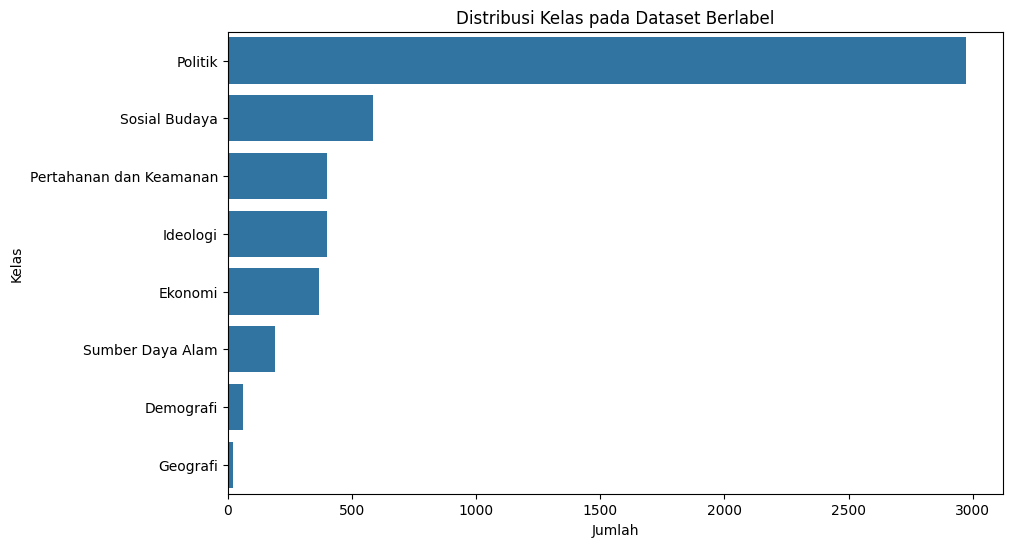

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi kelas pada dataset berlabel
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=labeled_df, order=labeled_df['label'].value_counts().index)
plt.title('Distribusi Kelas pada Dataset Berlabel')
plt.xlabel('Jumlah')
plt.ylabel('Kelas')
plt.show()

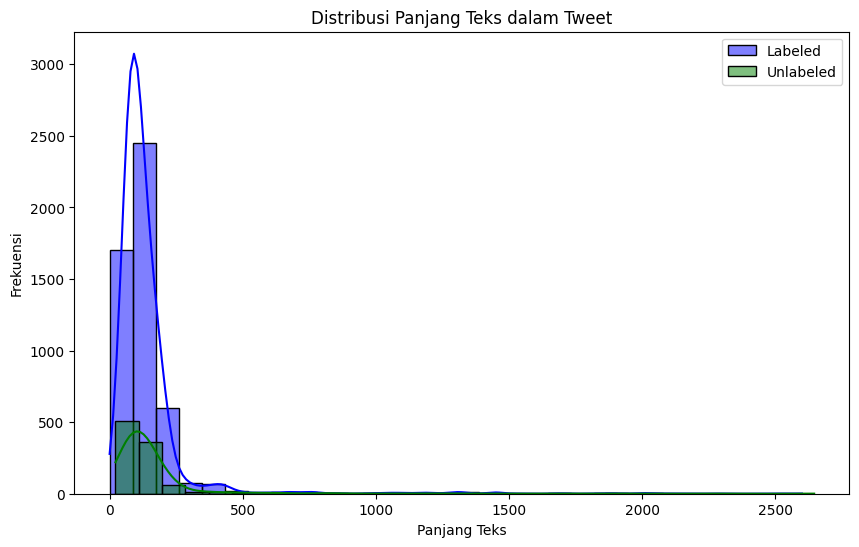

In [ ]:

# Visualisasi panjang teks dalam tweet
plt.figure(figsize=(10, 6))
labeled_df['text_length'] = labeled_df['processed_text'].apply(len)
unlabeled_df['text_length'] = unlabeled_df['processed_text'].apply(len)

sns.histplot(labeled_df['text_length'], bins=30, kde=True, color='blue', label='Labeled')
sns.histplot(unlabeled_df['text_length'], bins=30, kde=True, color='green', label='Unlabeled')
plt.title('Distribusi Panjang Teks dalam Tweet')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [ ]:
# Visualisasi word cloud dari dataset berlabel dan tanpa label
from wordcloud import WordCloud

# Gabungkan teks dari semua tweet
all_text_labeled = ' '.join(labeled_df['processed_text'])
all_text_unlabeled = ' '.join(unlabeled_df['processed_text'])

# Buat word cloud
wordcloud_labeled = WordCloud(width=800, height=400, background_color='white').generate(all_text_labeled)
wordcloud_unlabeled = WordCloud(width=800, height=400, background_color='white').generate(all_text_unlabeled)


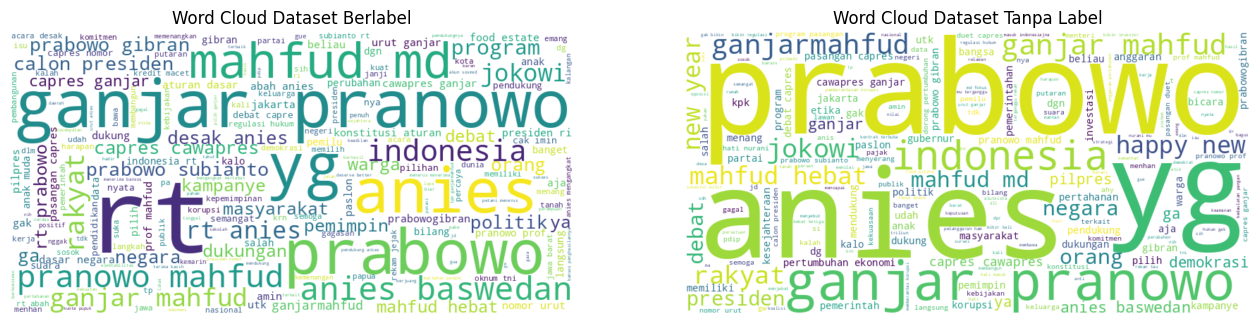

In [ ]:
# Plot word cloud
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_labeled, interpolation='bilinear')
plt.title('Word Cloud Dataset Berlabel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_unlabeled, interpolation='bilinear')
plt.title('Word Cloud Dataset Tanpa Label')
plt.axis('off')

plt.show()

## Pembagian Data dan Feature Extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Bagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(labeled_df['processed_text'], labeled_df['label'], test_size=0.3, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

  (0, 155)	0.07732362488343944
  (0, 2539)	0.3112214590824863
  (0, 648)	0.23259254596632184
  (0, 2541)	0.2733589118799808
  (0, 2851)	0.20261652531213495
  (0, 4198)	0.2785135691669019
  (0, 1697)	0.29150226817061214
  (0, 2304)	0.18800789963482306
  (0, 1044)	0.25770690950793196
  (0, 4027)	0.19308708751814935
  (0, 2626)	0.19369501484825008
  (0, 4220)	0.28446418429520914
  (0, 4573)	0.25175629437962477
  (0, 1097)	0.2785135691669019
  (0, 740)	0.29150226817061214
  (0, 1252)	0.2785135691669019
  (0, 4021)	0.061372143991175396
  (1, 3587)	0.33235674231224954
  (1, 4461)	0.2827240248913634
  (1, 3791)	0.09234748395000744
  (1, 1869)	0.33235674231224954
  (1, 4049)	0.3204973024995304
  (1, 4733)	0.5504159588989851
  (1, 3861)	0.48355619242434783
  (1, 2851)	0.2163763658518179
  :	:
  (3497, 2019)	0.29685361071487615
  (3497, 531)	0.2531271089083859
  (3497, 51)	0.4565395882632184
  (3497, 4888)	0.25917054036839826
  (3497, 4414)	0.19706656387518734
  (3497, 3791)	0.10409658655713235


In [ ]:
print(type(X_train_tfidf))

<class 'scipy.sparse._csr.csr_matrix'>


## Pelatihan dan Evaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score

# Latih model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_tfidf)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc}')


Balanced Accuracy: 0.26266369610623663


## Prediksi pada Dataset Tanpa Label

In [ ]:
# Transformasi data tanpa label
unlabeled_tfidf = vectorizer.transform(unlabeled_df['processed_text'])

# Prediksi kategori
unlabeled_df['predicted_label'] = model.predict(unlabeled_tfidf)



# Visualize

<Figure size 1000x800 with 0 Axes>

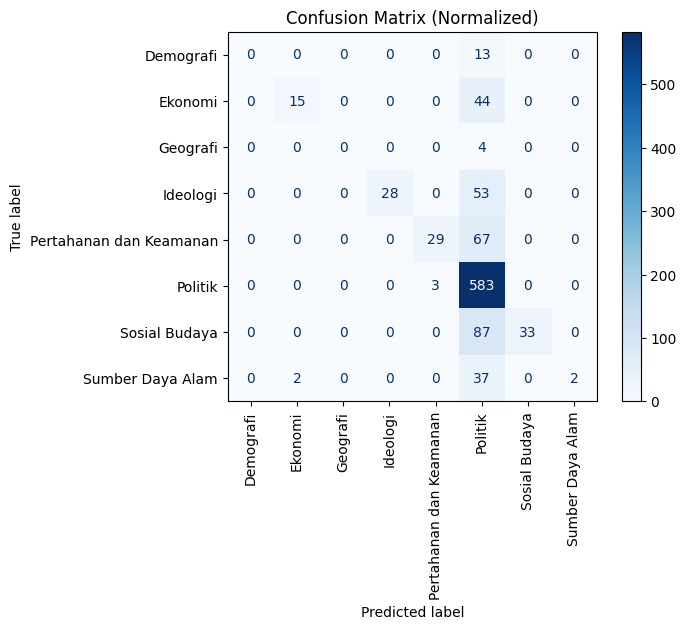

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix (Normalized)')
plt.show()


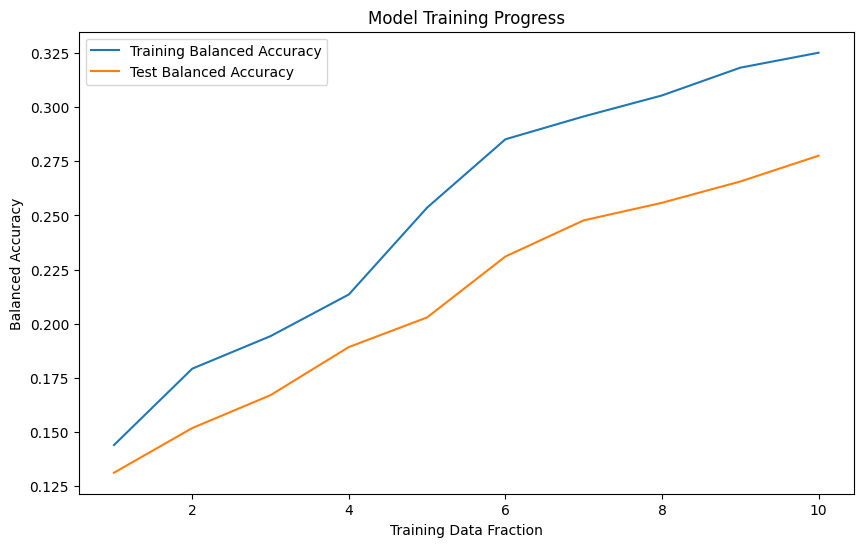

In [ ]:
# Visualize Training Progress
training_accuracy = []
test_accuracy = []
num_samples = X_train_tfidf.shape[0]

for i in range(1, 11):
    sample_size = i * num_samples // 10
    model.fit(X_train_tfidf[:sample_size], y_train[:sample_size])
    y_train_pred = model.predict(X_train_tfidf[:sample_size])
    y_test_pred = model.predict(X_test_tfidf)
    training_accuracy.append(balanced_accuracy_score(y_train[:sample_size], y_train_pred))
    test_accuracy.append(balanced_accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_accuracy, label='Training Balanced Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Balanced Accuracy')
plt.xlabel('Training Data Fraction')
plt.ylabel('Balanced Accuracy')
plt.title('Model Training Progress')
plt.legend()
plt.show()

## Visualize model

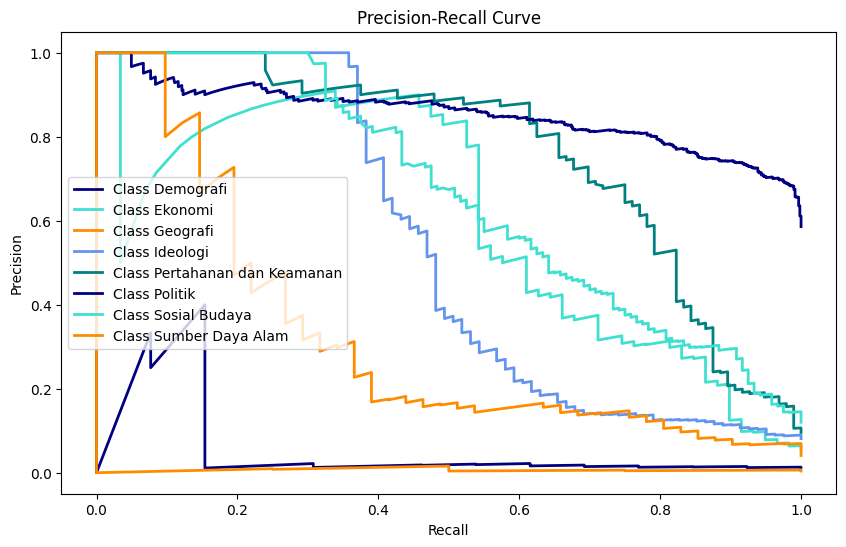

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from itertools import cycle

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(len(model.classes_)), colors):
    precision, recall, _ = precision_recall_curve(y_test == model.classes_[i], model.predict_proba(X_test_tfidf)[:, i])
    plt.plot(recall, precision, color=color, lw=2, label=f'Class {model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

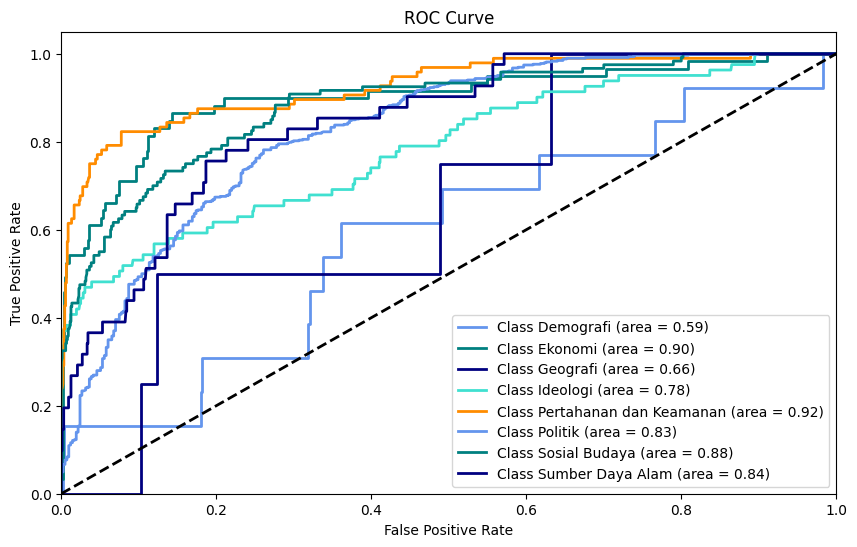

In [ ]:
# ROC Curve
plt.figure(figsize=(10, 6))
for i, color in zip(range(len(model.classes_)), colors):
    fpr, tpr, _ = roc_curve(y_test == model.classes_[i], model.predict_proba(X_test_tfidf)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {model.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()